## Unsupervised Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
#df = pd.read_csv('Data/Pipeline_data_toy_bin.csv', index_col=[0])
df = pd.read_csv('Data/Pipeline_data_bin.csv', index_col=[0])

df.head()

/rds/general/user/cam119/home/anaconda3/envs/ML_project/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,bmi,cigs_before_preg,birth_time,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,prior_births_living,...,m_morbidity,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change,birthweight_bin
0,30.7,0.0,1227.0,231.0,31.0,30.0,66.0,8.0,0.0,1.0,...,0.0,0.0,2.0,3.0,1.0,2.0,0.0,1.0,41.0,0
1,33.3,2.0,1704.0,185.0,35.0,35.0,63.0,9.0,0.0,2.0,...,0.0,1.0,1.0,3.0,4.0,2.0,1.0,0.0,-3.0,0
2,30.0,0.0,336.0,273.0,31.0,28.0,71.0,17.0,0.0,1.0,...,0.0,1.0,4.0,5.0,1.0,1.0,0.0,1.0,58.0,0
3,23.7,0.0,938.0,138.0,26.0,23.0,64.0,6.0,0.0,2.0,...,0.0,0.0,1.0,5.0,1.0,2.0,0.0,0.0,0.0,0
4,35.5,0.0,830.0,219.0,35.0,37.0,66.0,15.0,0.0,1.0,...,0.0,0.0,1.0,5.0,3.0,1.0,0.0,1.0,-1.0,1


In [3]:
X = df.drop(['birthweight_bin','birth_time'], axis=1)
y = df['birthweight_bin']

#### Try with only numeric features

In [4]:
X_num = X[['bmi','cigs_before_preg','m_deliveryweight','f_age','m_age','m_height_in',
           'num_prenatal_visits','prior_births_dead','prior_births_living','prior_terminations','prepreg_weight',
           'num_prev_cesareans','time_since_menses','weight_change','mn_prenatalcare_began']]

In [14]:
X_num_s.head()

,bmi,cigs_before_preg,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,prior_births_living,prior_terminations,prepreg_weight,num_prev_cesareans,time_since_menses,weight_change,mn_prenatalcare_began
0,0.526845,-0.233964,1.034181,-0.072935,0.170680,0.662555,-0.791092,-0.083295,-0.106517,1.754164,0.742950,-0.377544,0.001101,0.738857,0.079965
1,0.914983,0.188685,-0.080414,0.521922,1.031855,-0.395543,-0.550240,-0.083295,0.660567,-0.480393,0.694853,3.014788,-0.190385,-2.019130,0.079965
2,0.422346,-0.233964,2.051856,-0.072935,-0.173789,2.426051,1.376576,-0.083295,-0.106517,-0.480393,1.344163,-0.377544,0.001101,1.804443,1.404590
3,-0.518141,-0.233964,-1.219240,-0.816507,-1.034964,-0.042844,-1.272796,-0.083295,0.660567,-0.480393,-0.507574,-0.377544,-1.229691,-1.831085,1.404590
4,1.243407,-0.233964,0.743417,0.521922,1.376325,0.662555,0.894872,-0.083295,-0.106517,3.988721,1.464406,-0.377544,-0.767686,-1.893767,1.404590


In [6]:
scaler = StandardScaler()

X_num_s = scaler.fit_transform(X_num)

In [13]:
X_num_s = pd.DataFrame(X_num_s)
X_num_s.columns = X_num.columns

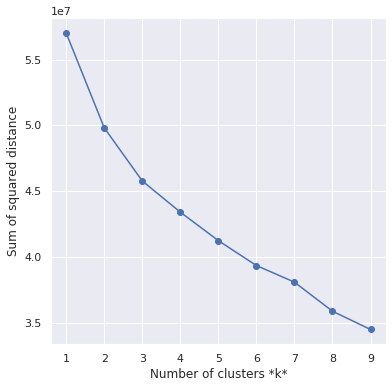

In [15]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_num_s)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.savefig('Results/Cluster_number.pdf')

In [29]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_num_s)
pred = kmeans.predict(X_num_s)

In [35]:
X_km = scaler.inverse_transform(X_num_s)
X_km = pd.DataFrame(X_km)
X_km.columns = X_num.columns

In [37]:
X_km['cluster'] = pred
X_km['cluster'].value_counts()

2    1567264
0    1437886
1     796384
Name: cluster, dtype: int64

In [38]:
X_km.groupby("cluster").describe()

bmi                                                    \
             count       mean       std        min   25%   50%   75%   
cluster                                                                
0        1437886.0  24.985103  3.919513   5.455589  22.0  24.7  27.5   
1         796384.0  36.970091  5.831055  14.100000  32.9  36.0  40.0   
2        1567264.0  24.196806  3.930304   5.463163  21.3  23.8  26.9   

                   cigs_before_preg            ... weight_change         \
               max            count      mean  ...           75%    max   
cluster                                        ...                        
0        61.500000        1437886.0  0.781127  ...          38.0  279.0   
1        85.604101         796384.0  1.435341  ...          35.0  250.0   
2        61.600000        1567264.0  1.239448  ...          40.0  279.0   

        mn_prenatalcare_began                                                
                        count      mean       std  min  25%  50%  75%   max  
cluster                                                                      
0                   1437886.0  2.750630  1.384248  0.0  2.0  2.0  3.0  10.0  
1                    796384.0  2.840067  1.439850  0.0  2.0  2.0  3.0  10.0  
2                   1567264.0  3.017196  1.638036  0.0  2.0  3.0  3.0  10.0  

[3 rows x 120 columns]

In [36]:
X_km.head()

,bmi,cigs_before_preg,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,prior_births_living,prior_terminations,prepreg_weight,num_prev_cesareans,time_since_menses,weight_change,mn_prenatalcare_began
0,30.7,0.0,231.0,31.0,30.0,66.0,8.0,1.734723e-18,1.0,2.0,190.0,0.0,262.000000,41.0,3.0
1,33.3,2.0,185.0,35.0,35.0,63.0,9.0,1.734723e-18,2.0,0.0,188.0,2.0,257.332614,-3.0,3.0
2,30.0,0.0,273.0,31.0,28.0,71.0,17.0,1.734723e-18,1.0,0.0,215.0,0.0,262.000000,58.0,5.0
3,23.7,0.0,138.0,26.0,23.0,64.0,6.0,1.734723e-18,2.0,0.0,138.0,0.0,232.000000,0.0,5.0
4,35.5,0.0,219.0,35.0,37.0,66.0,15.0,1.734723e-18,1.0,4.0,220.0,0.0,243.261171,-1.0,5.0


In [40]:
X_km['birthweight_bin'] = y

In [144]:
cluster1 = X_km[X_km['cluster'] == 0]
cluster2 = X_km[X_km['cluster'] == 1]
cluster3 = X_km[X_km['cluster'] == 2]

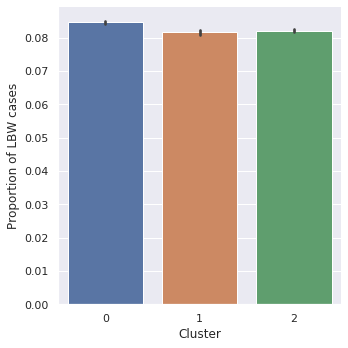

In [41]:
sns.catplot(x="cluster", y="birthweight_bin", kind="bar", data=X_km)
plt.ylabel('Proportion of LBW cases')
plt.xlabel('Cluster')
plt.savefig('Results/LBW_by_cluster_s.pdf')

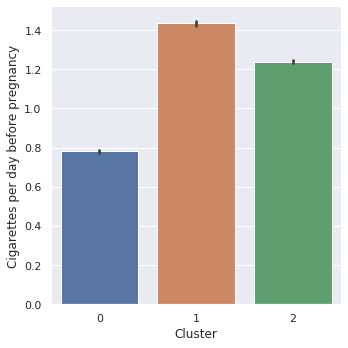

In [48]:
sns.catplot(x="cluster", y="cigs_before_preg", kind="bar", data=X_km)
plt.ylabel("Cigarettes per day before pregnancy")
plt.xlabel('Cluster')
plt.savefig('Results/Cigs_by_cluster_s.pdf')

Text(-3.9150000000000063, 0.5, "Mother's weight change")

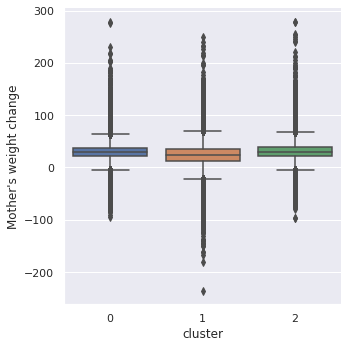

In [43]:
sns.catplot(x="cluster", y="weight_change", kind="box", data=X_km)
plt.ylabel("Mother's weight change")
#plt.xlabel('Cluster');

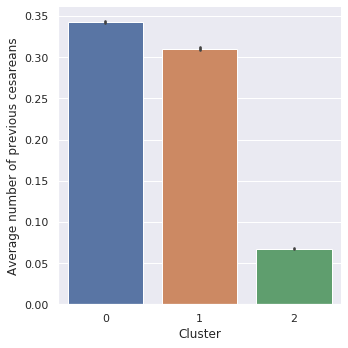

In [49]:
sns.catplot(x="cluster", y="num_prev_cesareans", kind="bar", data=X_km)
plt.ylabel("Average number of previous cesareans")
plt.xlabel('Cluster')
plt.savefig('Results/Cesareans_by_cluster_s.pdf')

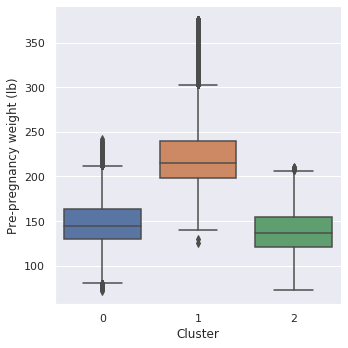

In [50]:
sns.catplot(x="cluster", y="prepreg_weight", kind="box", data=X_km)
plt.ylabel("Pre-pregnancy weight (lb)")
plt.xlabel('Cluster')
plt.savefig('Results/Prepreg_weight_s.pdf')

#### Try on all features, scaled or unscaled

In [37]:
scaler = StandardScaler()

X_s = scaler.fit_transform(X)

In [38]:
X_s = pd.DataFrame(X_s)
X_s.columns = X.columns

In [14]:
X_s.head()

,bmi,cigs_before_preg,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,prior_births_living,prior_terminations,...,infections,m_morbidity,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change
0,0.526845,-0.233964,1.034181,-0.072935,0.170680,0.662555,-0.791092,-0.083295,-0.106517,1.754164,...,-0.168316,-0.118559,-0.674871,0.412290,0.079965,-0.685034,1.251106,-0.430710,0.977882,0.738857
1,0.914983,0.188685,-0.080414,0.521922,1.031855,-0.395543,-0.550240,-0.083295,0.660567,-0.480393,...,-0.168316,-0.118559,1.481765,-0.964298,0.079965,1.896527,1.251106,2.321747,-1.022618,-2.019130
2,0.422346,-0.233964,2.051856,-0.072935,-0.173789,2.426051,1.376576,-0.083295,-0.106517,-0.480393,...,-0.168316,-0.118559,1.481765,3.165465,1.404590,-0.685034,-0.621719,-0.430710,0.977882,1.804443
3,-0.518141,-0.233964,-1.219240,-0.816507,-1.034964,-0.042844,-1.272796,-0.083295,0.660567,-0.480393,...,-0.168316,-0.118559,-0.674871,-0.964298,1.404590,-0.685034,1.251106,-0.430710,-1.022618,-1.831085
4,1.243407,-0.233964,0.743417,0.521922,1.376325,0.662555,0.894872,-0.083295,-0.106517,3.988721,...,-0.168316,-0.118559,-0.674871,-0.964298,1.404590,1.036006,-0.621719,-0.430710,0.977882,-1.893767


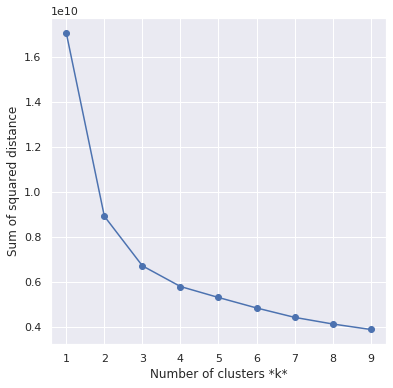

In [4]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.savefig('Results/Cluster_number.pdf')

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
pred = kmeans.predict(X)

In [5]:
#X_km = scaler.inverse_transform(X)
#X_km = pd.DataFrame(X_km)
#X_km.columns = X.columns

#OR 
X_km = X.copy()

In [6]:
X_km['cluster'] = pred
X_km['cluster'].value_counts()

1    1892920
0    1439206
2     469408
Name: cluster, dtype: int64

In [7]:
X_km.groupby("cluster").describe()

bmi                                                         \
             count       mean       std        min   25%        50%   75%   
cluster                                                                     
0        1439206.0  29.095202  3.854541   9.039932  26.5  28.854141  31.6   
1        1892920.0  22.627121  2.942650   5.455589  20.6  22.500000  24.5   
2         469408.0  39.593669  5.830305  14.100000  35.5  38.800000  42.8   

                   cigs_before_preg            ... infant_sex       \
               max            count      mean  ...        75%  max   
cluster                                        ...                   
0        69.300000        1439206.0  1.094326  ...        1.0  1.0   
1        67.800000        1892920.0  1.031854  ...        1.0  1.0   
2        85.604101         469408.0  1.449954  ...        1.0  1.0   

        weight_change                                                        
                count       mean        std    min   25%   50%   75%    max  
cluster                                                                      
0           1439206.0  31.030519  17.289834 -181.0  20.0  30.0  41.0  279.0  
1           1892920.0  28.829843  12.797861 -124.0  21.0  29.0  36.0  150.0  
2            469408.0  25.181698  21.383470 -236.0  12.0  23.0  36.0  279.0  

[3 rows x 304 columns]

In [8]:
X_km.head()

,bmi,cigs_before_preg,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,prior_births_living,prior_terminations,...,m_morbidity,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change,cluster
0,30.7,0.0,231.0,31.0,30.0,66.0,8.0,0.0,1.0,2.0,...,0.0,0.0,2.0,3.0,1.0,2.0,0.0,1.0,41.0,0
1,33.3,2.0,185.0,35.0,35.0,63.0,9.0,0.0,2.0,0.0,...,0.0,1.0,1.0,3.0,4.0,2.0,1.0,0.0,-3.0,0
2,30.0,0.0,273.0,31.0,28.0,71.0,17.0,0.0,1.0,0.0,...,0.0,1.0,4.0,5.0,1.0,1.0,0.0,1.0,58.0,2
3,23.7,0.0,138.0,26.0,23.0,64.0,6.0,0.0,2.0,0.0,...,0.0,0.0,1.0,5.0,1.0,2.0,0.0,0.0,0.0,1
4,35.5,0.0,219.0,35.0,37.0,66.0,15.0,0.0,1.0,4.0,...,0.0,0.0,1.0,5.0,3.0,1.0,0.0,1.0,-1.0,2


In [9]:
X_km['birthweight_bin'] = y

In [10]:
cluster1 = X_km[X_km['cluster'] == 0]
cluster2 = X_km[X_km['cluster'] == 1]
cluster3 = X_km[X_km['cluster'] == 2]

In [14]:
cluster1.describe()

,bmi,cigs_before_preg,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,prior_births_living,prior_terminations,...,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change,cluster,birthweight_bin
count,1.440063e+06,1.440063e+06,1.440063e+06,1.440063e+06,1.440063e+06,1.440063e+06,1.440063e+06,1.440063e+06,1.440063e+06,1.440063e+06,...,1.440063e+06,1.440063e+06,1.440063e+06,1.440063e+06,1.440063e+06,1.440063e+06,1.440063e+06,1.440063e+06,1440063.0,1.440063e+06
mean,2.908932e+01,1.094194e+00,2.032331e+02,3.174446e+01,2.930735e+01,6.467411e+01,1.143980e+01,1.615657e-02,1.202360e+00,4.600270e-01,...,3.390914e-01,1.701782e+00,2.859020e+00,1.848466e+00,1.340709e+00,1.675441e-01,5.143344e-01,3.103504e+01,0.0,7.248294e-02
std,3.854089e+00,4.674004e+00,1.748817e+01,6.649767e+00,5.719707e+00,2.713087e+00,4.122960e+00,1.881544e-01,1.342604e+00,9.266371e-01,...,4.734011e-01,7.217080e-01,1.486401e+00,1.184155e+00,5.358369e-01,3.734610e-01,4.997947e-01,1.728587e+01,0.0,2.592860e-01
min,9.039932e+00,-1.299674e+00,1.000000e+02,1.200000e+01,1.200000e+01,3.000000e+01,0.000000e+00,-2.221744e-02,-5.630394e-01,-3.206689e-02,...,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.810000e+02,0.0,0.000000e+00
25%,2.650000e+01,0.000000e+00,1.900000e+02,2.700000e+01,2.500000e+01,6.300000e+01,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.0,0.000000e+00
50%,2.880000e+01,0.000000e+00,2.010000e+02,3.100000e+01,2.900000e+01,6.500000e+01,1.200000e+01,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+01,0.0,0.000000e+00
75%,3.160000e+01,0.000000e+00,2.150000e+02,3.600000e+01,3.300000e+01,6.600000e+01,1.300000e+01,0.000000e+00,2.000000e+00,1.000000e+00,...,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,4.100000e+01,0.0,0.000000e+00
max,6.930000e+01,9.800000e+01,3.600000e+02,9.800000e+01,5.000000e+01,7.800000e+01,9.800000e+01,1.300000e+01,1.800000e+01,2.800000e+01,...,1.000000e+00,4.000000e+00,1.000000e+01,6.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.790000e+02,0.0,1.000000e+00


In [15]:
cluster2.describe()

,bmi,cigs_before_preg,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,prior_births_living,prior_terminations,...,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change,cluster,birthweight_bin
count,1.891500e+06,1.891500e+06,1.891500e+06,1.891500e+06,1.891500e+06,1.891500e+06,1.891500e+06,1.891500e+06,1.891500e+06,1.891500e+06,...,1.891500e+06,1.891500e+06,1.891500e+06,1.891500e+06,1.891500e+06,1.891500e+06,1.891500e+06,1.891500e+06,1891500.0,1.891500e+06
mean,2.262514e+01,1.031901e+00,1.574634e+02,3.126422e+01,2.873148e+01,6.332372e+01,1.102979e+01,1.321221e-02,1.063497e+00,3.859863e-01,...,2.492731e-01,1.724315e+00,2.899611e+00,1.667935e+00,1.318121e+00,1.310177e-01,5.085937e-01,2.882599e+01,1.0,9.068623e-02
std,2.941973e+00,4.579886e+00,1.677164e+01,6.825459e+00,5.920510e+00,2.683034e+00,4.067194e+00,1.705004e-01,1.252788e+00,8.341884e-01,...,4.325923e-01,7.375553e-01,1.541135e+00,1.096529e+00,5.314364e-01,3.374198e-01,4.999263e-01,1.279550e+01,0.0,2.871625e-01
min,5.455589e+00,-1.666759e+00,9.687709e+01,1.200000e+01,1.200000e+01,3.000000e+01,0.000000e+00,-2.814670e-02,-2.008096e-01,-8.485732e-02,...,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.240000e+02,1.0,0.000000e+00
25%,2.060000e+01,0.000000e+00,1.460000e+02,2.601628e+01,2.400000e+01,6.200000e+01,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01,1.0,0.000000e+00
50%,2.250000e+01,0.000000e+00,1.590000e+02,3.100000e+01,2.900000e+01,6.300000e+01,1.100000e+01,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.900000e+01,1.0,0.000000e+00
75%,2.450000e+01,0.000000e+00,1.700000e+02,3.500000e+01,3.300000e+01,6.500000e+01,1.300000e+01,0.000000e+00,2.000000e+00,1.000000e+00,...,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,3.600000e+01,1.0,0.000000e+00
max,6.780000e+01,9.800000e+01,2.320000e+02,9.500000e+01,5.000000e+01,7.800000e+01,9.600000e+01,1.200000e+01,1.800000e+01,2.700000e+01,...,1.000000e+00,4.000000e+00,1.000000e+01,6.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,1.500000e+02,1.0,1.000000e+00


In [16]:
cluster3.describe()

,bmi,cigs_before_preg,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,prior_births_living,prior_terminations,...,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change,cluster,birthweight_bin
count,469971.000000,469971.000000,469971.000000,469971.000000,469971.000000,469971.000000,469971.000000,469971.000000,469971.000000,469971.000000,...,469971.000000,469971.000000,469971.000000,469971.000000,469971.000000,469971.000000,469971.000000,469971.000000,469971.0,469971.000000
mean,39.587513,1.449555,266.802690,31.622552,29.211951,65.638852,11.834213,0.019840,1.247600,0.514866,...,0.488949,1.600716,2.859398,2.151228,1.360918,0.225073,0.511934,25.183708,2.0,0.083586
std,5.830782,5.443137,32.173984,6.506401,5.543594,2.774485,4.487634,0.204860,1.363698,1.015066,...,0.499878,0.686226,1.451807,1.259808,0.536542,0.417631,0.499858,21.383344,0.0,0.276766
min,14.100000,-0.523796,139.000000,11.000000,12.000000,30.000000,0.000000,-0.000111,-0.627657,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-236.000000,2.0,0.000000
25%,35.500000,0.000000,244.000000,27.000000,25.000000,64.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,12.000000,2.0,0.000000
50%,38.800000,0.000000,260.000000,31.000000,29.000000,66.000000,12.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,23.000000,2.0,0.000000
75%,42.800000,0.000000,282.000000,36.000000,33.000000,67.000000,14.000000,0.000000,2.000000,1.000000,...,1.000000,2.000000,3.000000,3.000000,2.000000,0.000000,1.000000,36.000000,2.0,0.000000
max,85.604101,98.000000,400.000000,91.000000,50.000000,87.453835,97.000000,12.000000,17.000000,27.000000,...,1.000000,4.000000,10.000000,6.000000,4.000000,1.000000,1.000000,279.000000,2.0,1.000000


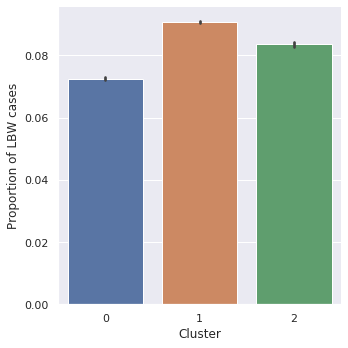

In [19]:
sns.catplot(x="cluster", y="birthweight_bin", kind="bar", data=X_km)
plt.ylabel('Proportion of LBW cases')
plt.xlabel('Cluster')
plt.savefig('Results/LBW_by_cluster_final.pdf')

Text(0.5, 8.95999999999998, 'Cluster')

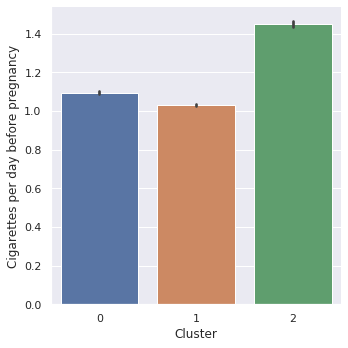

In [12]:
sns.catplot(x="cluster", y="cigs_before_preg", kind="bar", data=X_km)
plt.ylabel("Cigarettes per day before pregnancy")
plt.xlabel('Cluster')
#plt.savefig('Results/Cigs_by_cluster_final.pdf')

Text(-3.9150000000000063, 0.5, "Mother's weight change")

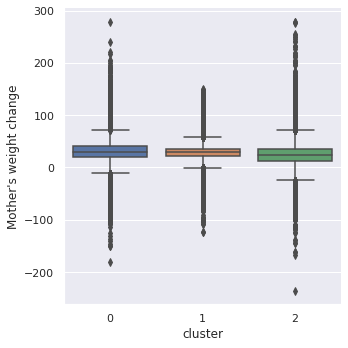

In [13]:
sns.catplot(x="cluster", y="weight_change", kind="box", data=X_km)
plt.ylabel("Mother's weight change")
#plt.xlabel('Cluster');

Text(0.5, 8.95999999999998, 'Cluster')

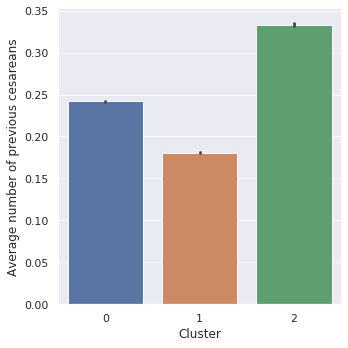

In [14]:
sns.catplot(x="cluster", y="num_prev_cesareans", kind="bar", data=X_km)
plt.ylabel("Average number of previous cesareans")
plt.xlabel('Cluster')
#plt.savefig('Results/Cesareans_by_cluster_final.pdf')

Text(0.5, 8.95999999999998, 'Cluster')

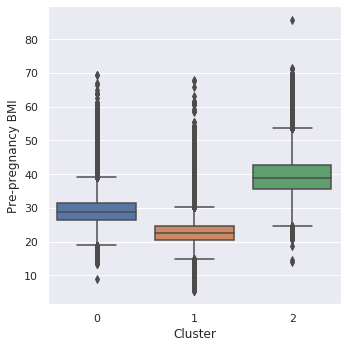

In [16]:
sns.catplot(x="cluster", y="bmi", kind="box", data=X_km)
plt.ylabel("Pre-pregnancy BMI")
plt.xlabel('Cluster')
#plt.savefig('Results/Prepreg_bmi_all.pdf')

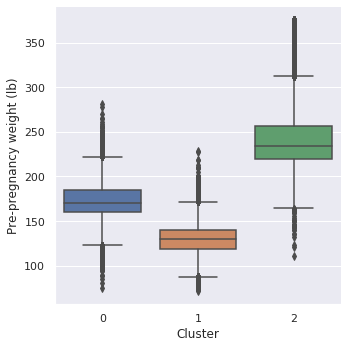

In [24]:
sns.catplot(x="cluster", y="prepreg_weight", kind="box", data=X_km)
plt.ylabel("Pre-pregnancy weight (lb)")
plt.xlabel('Cluster')
plt.savefig('Results/Prepreg_weight_all_final.pdf')

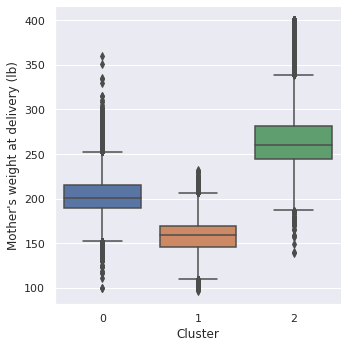

In [20]:
sns.catplot(x="cluster", y="m_deliveryweight", kind="box", data=X_km)
plt.ylabel("Mother's weight at delivery (lb)")
plt.xlabel('Cluster')
plt.savefig('Results/Deliveryweight_cluster_final.pdf')

In [21]:
import graphviz 

# Helper function to plot the decision tree. This uses the graphviz library.
def plot_tree(graph, feature_names=None, class_names=None):
    '''
    This method takes a DecisionTreeClassifier object, along with a list of feature names and target names
    and plots a tree. The feature names and class names can be left empty; they are just there for labelling 
    '''
    dot_data = export_graphviz(graph, out_file=None, 
                      feature_names=feature_names,  
                      class_names=class_names,  
                      filled=True, rounded=True,  
                      special_characters=True) 
    
    graph = graphviz.Source(dot_data)
    
    return graph


In [38]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [22]:
X = X_km.drop(['cluster'], axis=1)
y = X_km['cluster']

#X_train, X_test, y_train, y_test = train_test_split(X_km, y, test_size=0.2, random_state=0)

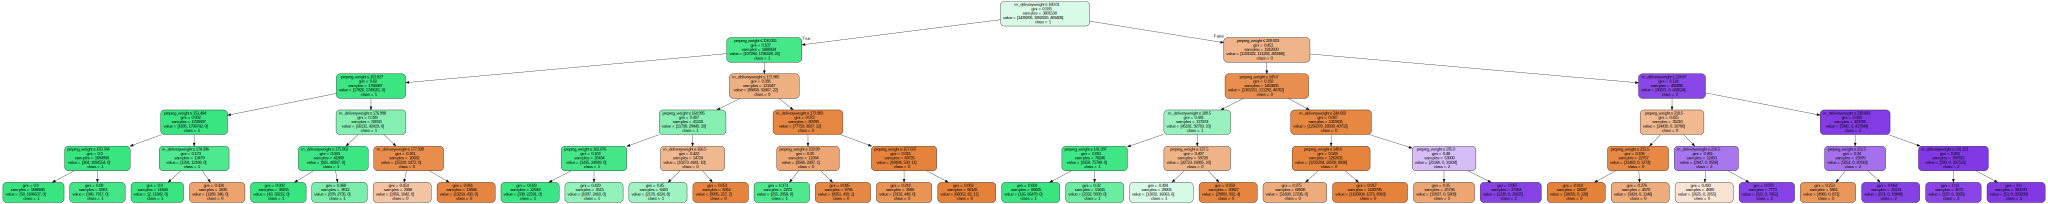

In [23]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dt = DecisionTreeClassifier(max_depth=5).fit(X, y)
#y_pred2 = dt.predict(X_test)

plot_tree(dt, X.columns, ['0','1','2'])

#### Try clustering after removing anomalies

In [28]:
from sklearn.ensemble import IsolationForest

In [29]:
iso_f = IsolationForest(n_estimators = 100, 
                        max_samples = 256,
                        contamination = 'auto', 
                        random_state = 0)
iso_f.fit(X_num)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=256, n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

In [30]:
y_pred = iso_f.predict(X_num)
y_pred = [1 if x == -1 else 0 for x in y_pred]

In [31]:
np.mean(y_pred)

0.057723540023579954

In [32]:
outlier_idx = []

for i in range(1, len(y_pred)):
    if y_pred[i] == 1:
        idx = i
        outlier_idx.append(idx)

In [33]:
len(outlier_idx)

219438

In [34]:
X_num = pd.DataFrame(X_num)
y = pd.DataFrame(y)

In [35]:
X_if = X_num.drop(axis=0, index=outlier_idx)
y_if = y.drop(axis=0, index=outlier_idx)

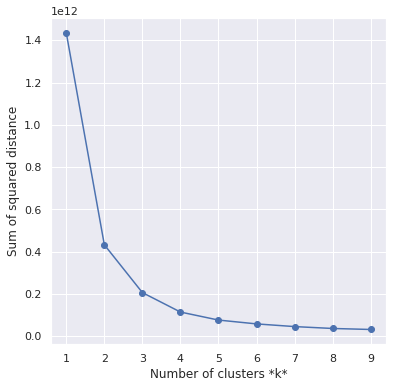

In [36]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_if)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [37]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_if)
pred = kmeans.predict(X_if)

In [38]:
X_km = X_if.copy()
X_km['cluster'] = pred
X_km['cluster'].value_counts()

0    1520195
2    1163711
1     898190
Name: cluster, dtype: int64

In [39]:
X_km.groupby("cluster").describe()

bmi                                                         \
             count       mean       std       min   25%   50%   75%   max   
cluster                                                                     
0        1520195.0  26.834826  6.033509  5.455589  22.3  25.7  30.2  69.3   
1         898190.0  26.279677  5.711871  6.316352  22.0  25.1  29.3  69.3   
2        1163711.0  26.593910  5.894444  5.463163  22.2  25.5  30.0  62.1   

        cigs_before_preg            ... weight_change         \
                   count      mean  ...           75%    max   
cluster                             ...                        
0              1520195.0  0.866113  ...          38.0  279.0   
1               898190.0  0.775242  ...          38.0  240.0   
2              1163711.0  0.856816  ...          39.0  254.0   

        mn_prenatalcare_began                                                
                        count      mean       std  min  25%  50%  75%   max  
cluster                                                                      
0                   1520195.0  2.843427  1.433663  0.0  2.0  3.0  3.0  10.0  
1                    898190.0  2.842909  1.453080  0.0  2.0  3.0  3.0  10.0  
2                   1163711.0  2.842772  1.435517  0.0  2.0  3.0  3.0  10.0  

[3 rows x 128 columns]

In [64]:
X_km.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,30.7,0.0,231.0,31.0,30.0,66.0,8.0,1.734723e-18,1.0,2.0,...,0.0,0.0,0.0,2.0,3.0,1.0,2.0,0.0,1.0,41.0
1,33.3,2.0,185.0,35.0,35.0,63.0,9.0,1.734723e-18,2.0,0.0,...,0.0,0.0,1.0,1.0,3.0,4.0,2.0,1.0,0.0,-3.0
2,30.0,0.0,273.0,31.0,28.0,71.0,17.0,1.734723e-18,1.0,0.0,...,0.0,0.0,1.0,4.0,5.0,1.0,1.0,0.0,1.0,58.0
3,23.7,0.0,138.0,26.0,23.0,64.0,6.0,1.734723e-18,2.0,0.0,...,0.0,0.0,0.0,1.0,5.0,1.0,2.0,0.0,0.0,0.0
4,35.5,0.0,219.0,35.0,37.0,66.0,15.0,1.734723e-18,1.0,4.0,...,0.0,0.0,0.0,1.0,5.0,3.0,1.0,0.0,1.0,-1.0


In [41]:
X_km['birthweight_bin'] = y

In [42]:
cluster1 = X_km[X_km['cluster'] == 0]
cluster2 = X_km[X_km['cluster'] == 1]
cluster3 = X_km[X_km['cluster'] == 2]
cluster4 = X_km[X_km['cluster'] == 3]

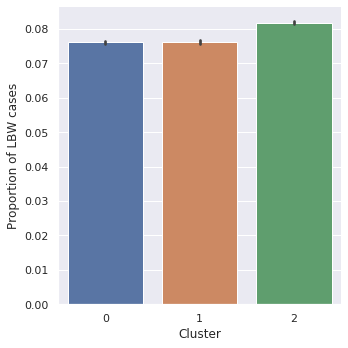

In [51]:
sns.catplot(x="cluster", y="birthweight_bin", kind="bar", data=X_km)
plt.ylabel('Proportion of LBW cases')
plt.xlabel('Cluster')
plt.savefig('LBW by cluster.pdf')

FileNotFoundError: [Errno 2] No such file or directory: 'Cig/day by cluster.pdf'

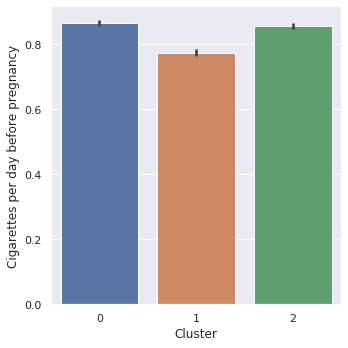

In [52]:
sns.catplot(x="cluster", y="cigs_before_preg", kind="bar", data=X_km)
plt.ylabel("Cigarettes per day before pregnancy")
plt.xlabel('Cluster')
plt.savefig('Cig/day by cluster.pdf')

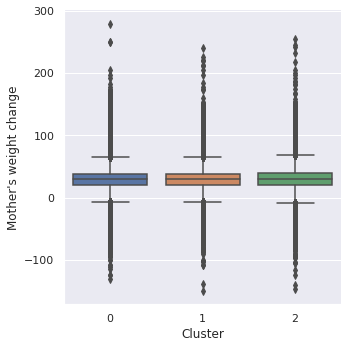

In [46]:
sns.catplot(x="cluster", y="weight_change", kind="box", data=X_km)
plt.ylabel("Mother's weight change")
plt.xlabel('Cluster');

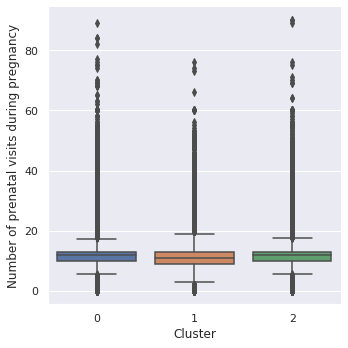

In [47]:
sns.catplot(x="cluster", y="num_prenatal_visits", kind="box", data=X_km)
plt.ylabel("Number of prenatal visits during pregnancy")
plt.xlabel('Cluster');

In [ ]:
sns.catplot(x="cluster", y="num_prev_cesareans", kind="bar", data=X_km)
plt.ylabel("Average number of previous cesareans")
plt.xlabel('Cluster')
plt.savefig('Cesareans by cluster.pdf')

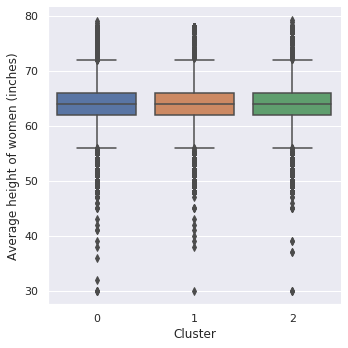

In [49]:
sns.catplot(x="cluster", y="m_height_in", kind="box", data=X_km)
plt.ylabel("Average height of women (inches)")
plt.xlabel('Cluster');

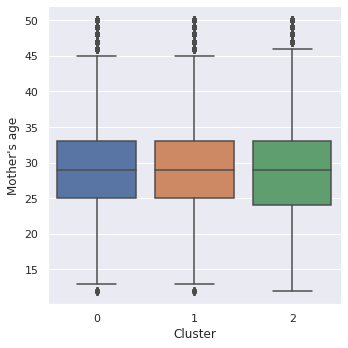

In [50]:
sns.catplot(x="cluster", y="m_age", kind="box", data=X_km)
plt.ylabel("Mother's age")
plt.xlabel('Cluster');

#### Try with PCA on all features

In [163]:
num_cols = ('bmi','cigs_before_preg','birth_time','m_deliveryweight','f_age','m_age','m_height_in',
            'num_prenatal_visits','prior_births_dead','prior_births_living','prior_terminations','prepreg_weight',
            'num_prev_cesareans','time_since_menses','weight_change','mn_prenatalcare_began')

bin_cols = ('gonorrhea','labour_induced','admit_icu','m_transferred','infections','m_morbidity','riskf',
            'prev_cesarean','infant_sex')

cat_cols = ('birth_attendant','birth_place','birth_mn','birth_dy','f_education','f_hispanic','f_race6',
            'm_nativity','m_education','m_hispanic','m_race6','payment','delivery_method','res_status')

In [164]:
num_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(drop='first'))])


preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('num', num_transformer , num_cols),
            ('cat', cat_transformer , cat_cols)
        ])

In [165]:
X_processed = preprocessor.fit_transform(X)

In [166]:
X_processed = pd.DataFrame(X_processed)
X_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.810418,-0.230973,0.196021,2.893451,-0.594191,-0.695671,-0.049740,1.641846,-0.083903,-0.885747,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.250946,-0.230973,-0.953470,-0.233957,-1.754119,-2.253880,0.310014,-1.326265,-0.083903,-0.885747,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.795515,-0.230973,-0.761888,-0.830791,-0.668885,-0.868806,-0.409494,0.899818,-0.083903,-0.885747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.663052,-0.230973,-0.747520,-0.926284,-0.071061,-0.176268,-0.769248,1.147161,-0.083903,-0.104459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.000092,0.366727,0.326935,0.076396,-0.519429,0.343135,-0.409494,-0.831580,-0.083903,-0.104459,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


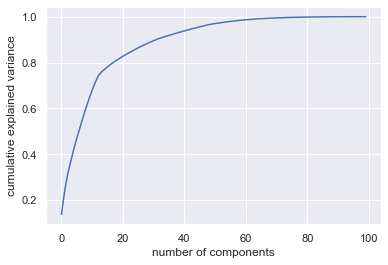

In [167]:
pca = PCA().fit(X_processed)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [175]:
pca = PCA(n_components=50)
X_all_pca = pca.fit_transform(X_processed)

X_all_pca = pd.DataFrame(X_all_pca)

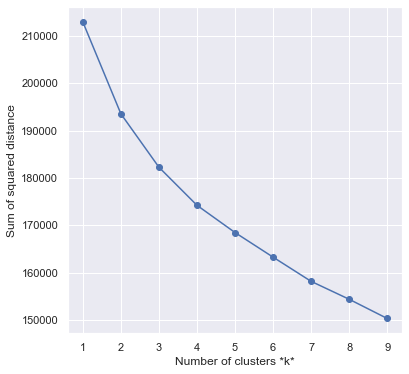

In [176]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_all_pca)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

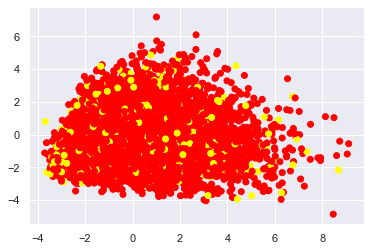

ValueError: 'c' argument has 10000 elements, which is not acceptable for use with 'x' with size 500000, 'y' with size 500000.

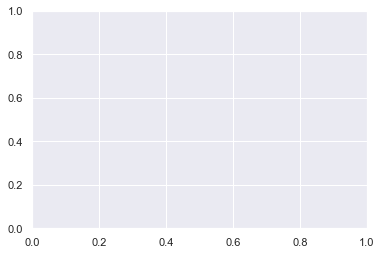

In [178]:
plt.scatter(X_all_pca.iloc[:, 0], X_all_pca.iloc[:, 1], c=y, cmap='autumn')
plt.show()

def plot_kmeans_n(n=2, data_set=X):
    kmeans = KMeans(n_clusters=n)
    
    # Predict the centers of the datasets using fit_predict
    y_pred = kmeans.fit_predict(data_set)
    
    # Plot
    plt.scatter(data_set.iloc[:, :], data_set.iloc[:, :], c=y_pred)
    plt.title(f'N={n}')
    plt.show()

# Try running this function for different values of n
plot_kmeans_n(3, X_all_pca)

In [183]:
kmeans2 = KMeans(n_clusters=2).fit(principalDf)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = principalDf.iloc[:, 0].min() - 1, principalDf.iloc[:, 0].max() + 1
y_min, y_max = principalDf.iloc[:, 1].min() - 1, principalDf.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(principalDf.iloc[:, 0], principalDf.iloc[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans2.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

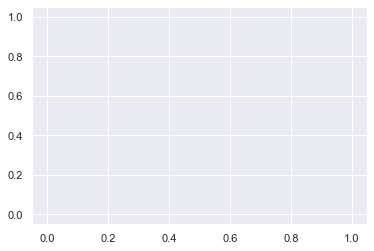

In [182]:
# Extract the projections of the first 2 components
pca2 = X_all_pca.iloc[:, :2]

# Plot the first 2 components
principalDf = pd.DataFrame(data = pca2, 
                           columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([y, principalDf], axis = 1)
finalDf.columns = ['labels', 'principal component 1', 'principal component 2']

ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue='labels', data=finalDf)
plt.show()